In [21]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

NUM = 100

We generate some random time series and visualize it

<AxesSubplot:xlabel='time', ylabel='value'>

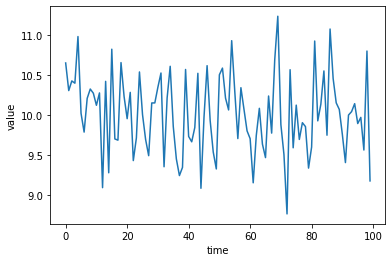

In [22]:
df = pd.DataFrame({'time':range(NUM),'value':[random.gauss(10,0.5) for x in range(NUM)]})
sns.lineplot(data=df, x='time', y='value')

<AxesSubplot:xlabel='time', ylabel='value'>

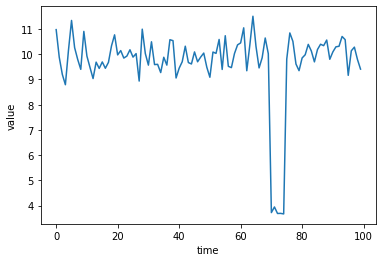

In [4]:
_ = df.copy()
_.iloc[70:75]['value'] *= random.random()
sns.lineplot(data=_, x='time', y='value')

We analyze the standard deviation, and we see that everything works as expected.

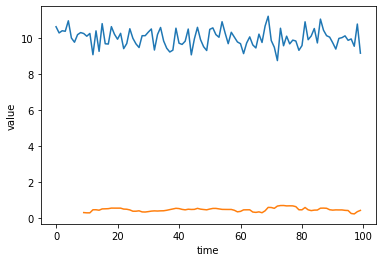

In [24]:
std = df['value'].rolling(window=10).std()

sns.lineplot(data=df, x='time', y='value')
plt.plot(std)

Now we artificially create an anomaly. Immediately the standard deviation notices that in a certain time frame values have changed too much.

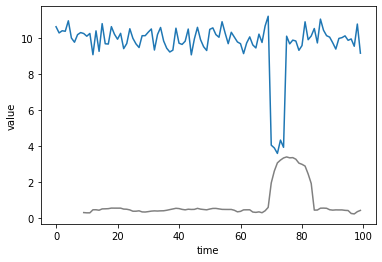

In [26]:
_ = df.copy()
_.iloc[70:75]['value'] *= random.random()
std = _['value'].rolling(window=10).std()

sns.lineplot(data=_, x='time', y='value')
plt.plot(std,color='gray')

We can also use thresholds to immediately check where this occurs.

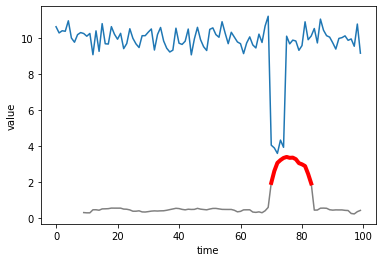

In [27]:
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 1], color='red',lw=4)

Beware of the parametrization. Too low thresholds may identify everything as an anoamly.

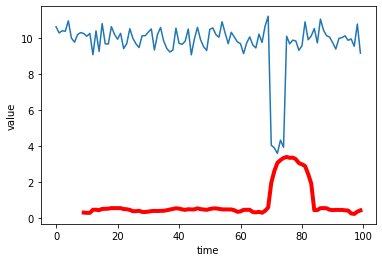

In [28]:
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 0.1], color='red',lw=4)

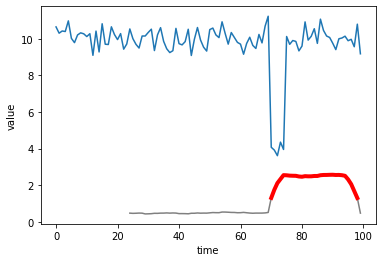

In [31]:
std = _['value'].rolling(window=25).std()
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 1], color='red',lw=4)

In [10]:
_ = df.copy()
_.iloc[0:100:40]['value'] *= 1.3
_.iloc[1:100:40]['value'] *= 0.7


Too wide windows may identify the anomaly even when it has been solved.

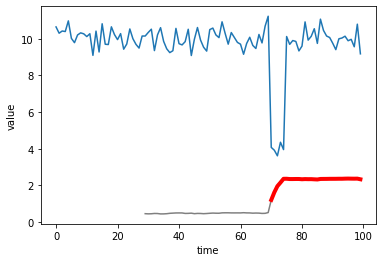

In [32]:
std = _['value'].rolling(window=30).std()
sns.lineplot(data=_, x='time', y='value')
plt.plot(std, color='gray')
plt.plot(std[std.values > 1], color='red',lw=4)

Let's now take a look at One Class SVM. We generate some data and visualize it.

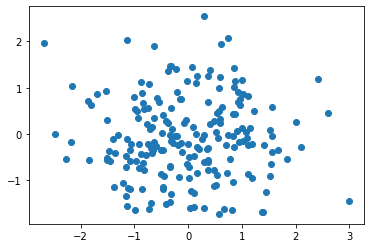

In [33]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random


x, _ = make_blobs(n_samples=200, centers=10, cluster_std=1, center_box=(0,0))

plt.scatter(x[:,0], x[:,1])
plt.show()

One Class SVM makes it very easy to understand whether points are outside of a "normal" area, thus are identified as novelties by the algorithm.

In [34]:
svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm.fit(x)
pred = svm.predict(x)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1])

And we can also see them graphically.

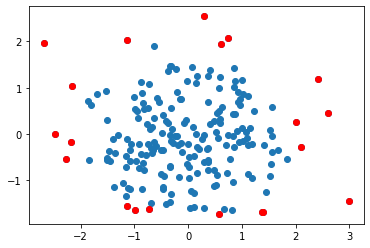

In [35]:
anomalies = x[where(pred==-1)]
plt.scatter(x[:,0], x[:,1])
plt.scatter(anomalies[:,0], anomalies[:,1], color='r')
plt.show()

We can also evaluate each point separately depending on the score, which gives an idea about the rank of the novelty of any given point.

In [36]:
pred = svm.fit_predict(x)
scores = svm.score_samples(x)
thresh = quantile(scores, 0.3)
scores

array([10.22649756, 10.72017882, 11.36111426, 11.36770891, 10.41333914,
       10.24742692, 11.62483425, 11.35227052, 11.59342274, 11.39655536,
       11.16930409, 10.51322529, 10.52261912, 11.52439005, 11.6077144 ,
       11.66989565, 10.94105061, 11.33260869, 11.23566544, 11.61726093,
        9.39906647,  9.9168021 ,  9.51660382, 11.40266717, 11.52968266,
       11.46265617, 11.19964889,  9.64262067, 11.25110147, 11.07081588,
       10.84542776, 11.64321189, 10.49690662, 11.37546062, 11.4807059 ,
       10.63805797, 10.64902834, 11.37279117,  9.10866652, 11.62897209,
       11.40086588, 11.3641606 , 11.5001816 , 11.2687206 ,  9.77889881,
        9.0765934 ,  9.71391107,  9.64324369, 10.99654222, 10.33802422,
       10.90520036,  9.43291998, 11.61875765,  9.0539694 , 11.3366569 ,
        9.81046705, 11.26977376, 10.64509116, 11.65680901, 10.16205987,
       10.79343109, 10.35069009, 10.02598899, 11.64135737, 10.5360064 ,
       10.08342604, 10.47904402, 10.25893739, 11.25755874, 10.08

Again, we select only points beyond a certain threshold to see them graphically.

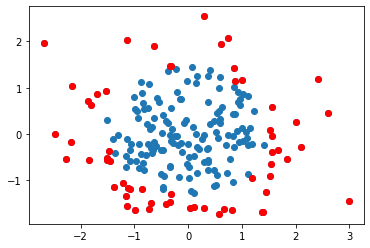

In [37]:
index = where(scores<=thresh)
values = x[index]
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()